# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [149]:
ans_1 = "There were 17 marketing campaigns between May 2008 to Nov 2010"
print(ans_1)

There were 17 marketing campaigns between May 2008 to Nov 2010


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, ConfusionMatrixDisplay
)

import time

In [154]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [156]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [158]:
df.shape

(41188, 21)

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [163]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [165]:
#checking unique values in each column
print("Unique values per column:")
print(df.nunique())

Unique values per column:
age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64


In [167]:
#checking for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**So, there are no missing values in the dataset.**

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

**Business Objective**

Help the bank identify likely subscribers of term deposits so that marketing calls can be prioritized. A good predictive model can reduce wasted calls and increase campaign efficiency.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [173]:
#getting a count of 'unknown' in the dataset
unknowns = df.isin(['unknown']).sum()
print("Count of 'unknown' per column:")
print(unknowns[unknowns > 0])

Count of 'unknown' per column:
job           330
marital        80
education    1731
default      8597
housing       990
loan          990
dtype: int64


There are large number of 'unknown' in the dataset which need to be handled.

In [176]:
#handling unknown values

df_clean = df.copy()

#replacing 'unknown' with mode in selected columns
for col in ['job', 'marital', 'education']:
    mode = df_clean[col].mode()[0]
    df_clean[col] = df_clean[col].replace('unknown', mode)

#dropping 'default' column due to high missingness and limited predictive power
df_clean = df_clean.drop(columns = ['default'])

#for 'housing' and 'loan' columns – keeping 'unknown' as a valid category

In [178]:
#confirming no remaining 'unknown' entries (except 'housing' and 'loan')
print(df_clean.isin(['unknown']).sum())

age                 0
job                 0
marital             0
education           0
housing           990
loan              990
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64


So, now there are no 'unknown' values in the dataset ecept housing and loan columns where these have been retained as genuine entries.

In [181]:
#dropping the column 'duration' 
df_clean = df.drop(columns=['duration'])

The 'duration' column has been dropped as it is highly predictive but only known after the call is complete. Including it would result in data leakage and unrealistic model performance.

In [184]:
#checking columnn types

cat_cols = df_clean.select_dtypes(include = 'object').columns.tolist()
num_cols = df_clean.select_dtypes(include = ['int64', 'float64']).columns.tolist()

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
Numerical columns: ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


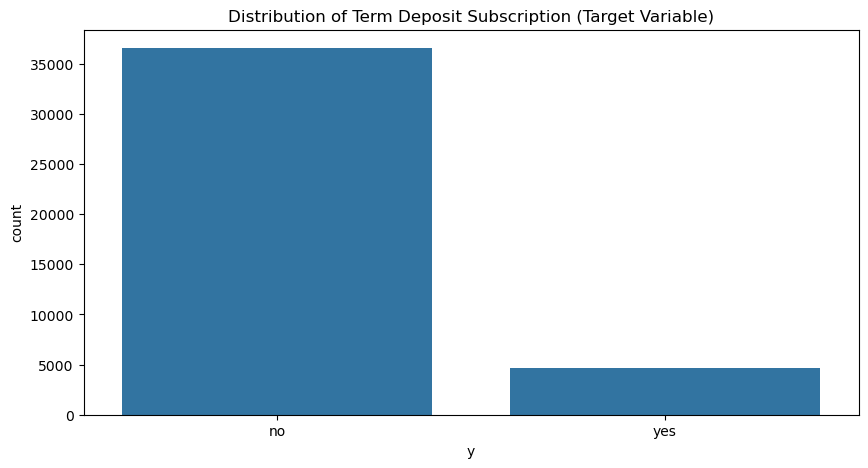

In [186]:
#plotting distribution of target variable
plt.figure(figsize = (10,5))
sns.countplot(data = df_clean, x ='y')
plt.title("Distribution of Term Deposit Subscription (Target Variable)")
plt.show()

Class imbalance is evident in the data. Baseline accuracy will be misleading and hence metric selection will be critical. May require prioritizing F1-score and recall in evaluating classifier performance.

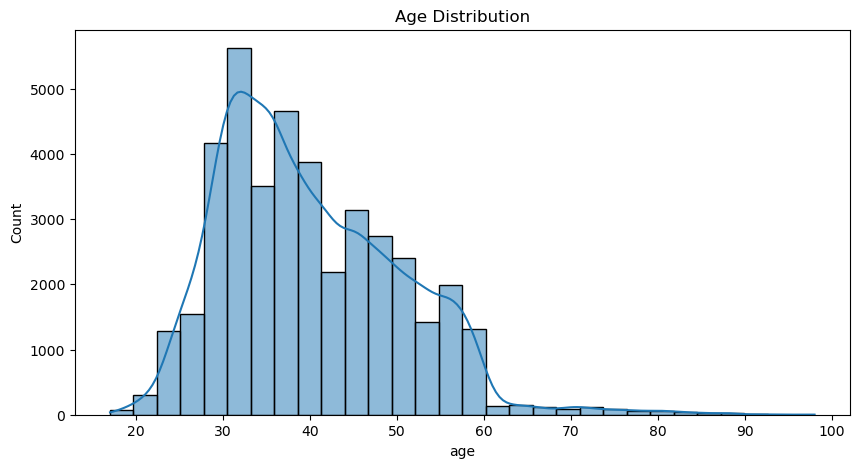

In [189]:
#plotting distribution of age
plt.figure(figsize = (10,5))
sns.histplot(data = df_clean, x ='age', bins = 30, kde = True)
plt.title("Age Distribution")
plt.show()

The distribution is right-skewed. 
Most clients fall within the 30 to 40 year age range.
There's a sharp decline after age 60.
Very few clients are above 70 years, although some data points extend up to 90+ years.

**Implications**

Age could be a significant predictor of term deposit subscription due to financial priorities varying with life stage.
Age needs to be scaled or normalized when used in models like Logistic Regression or SVM.

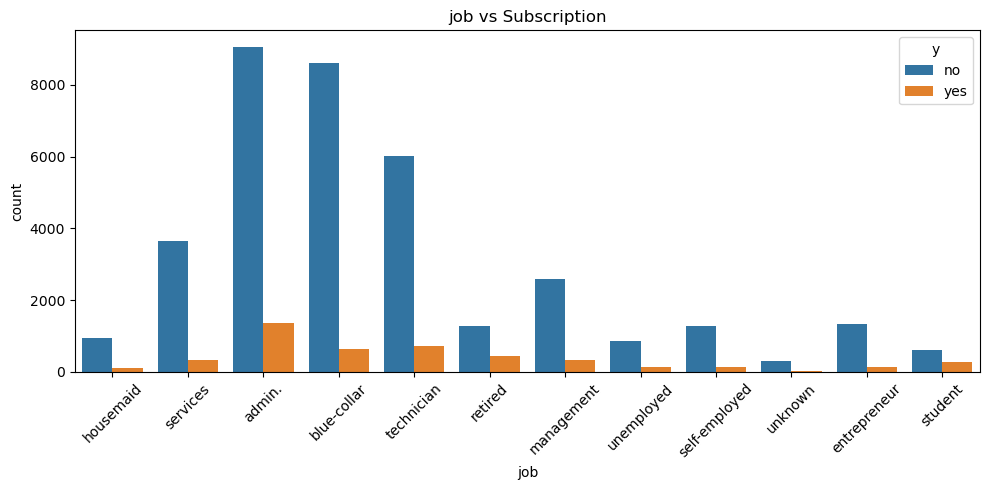

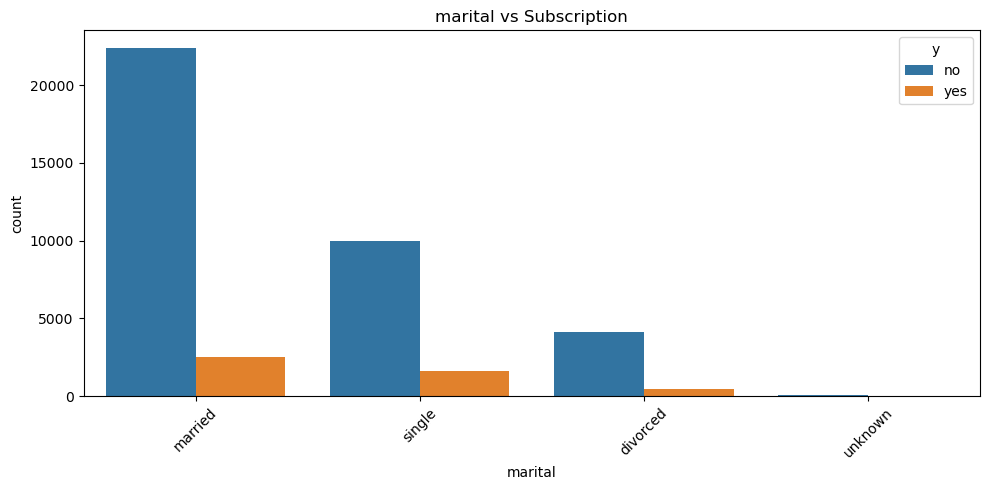

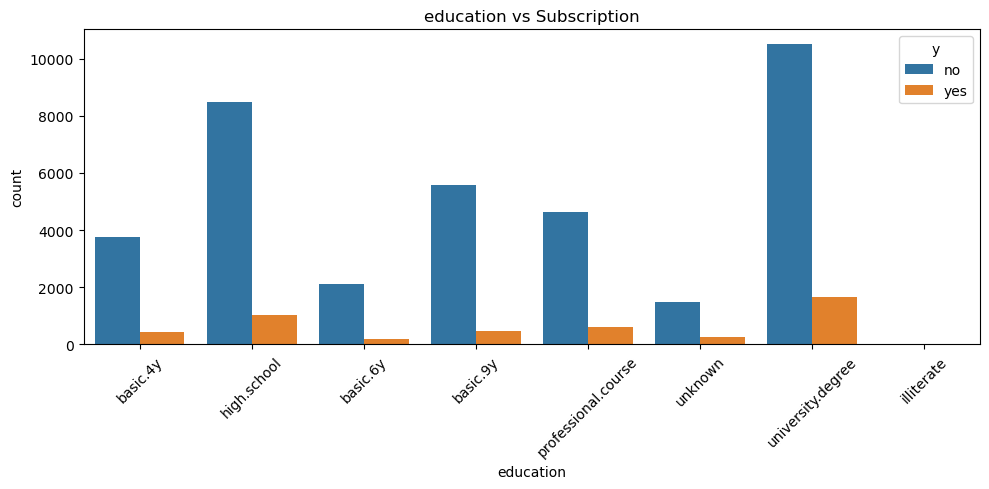

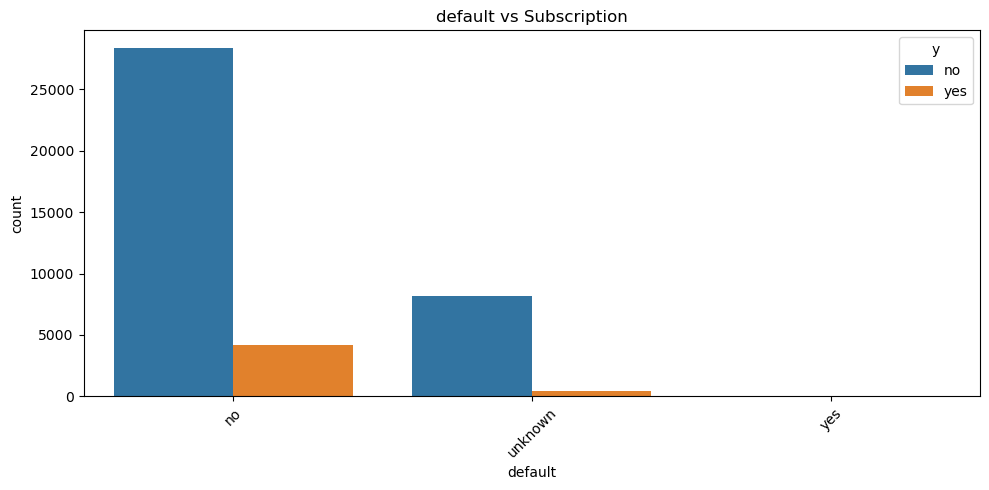

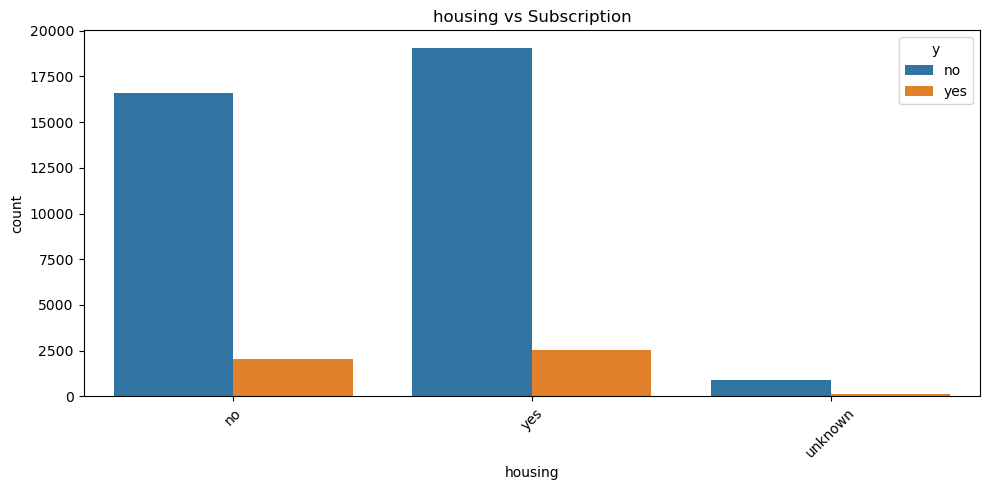

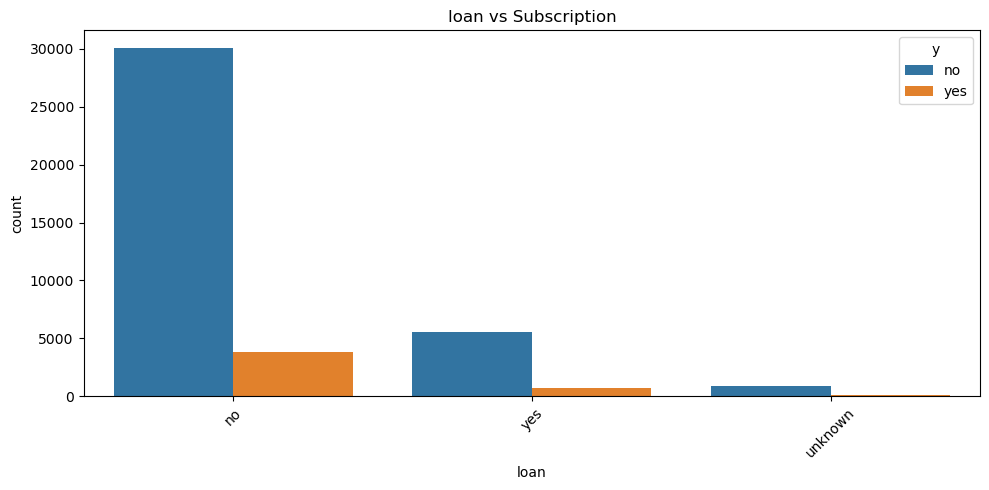

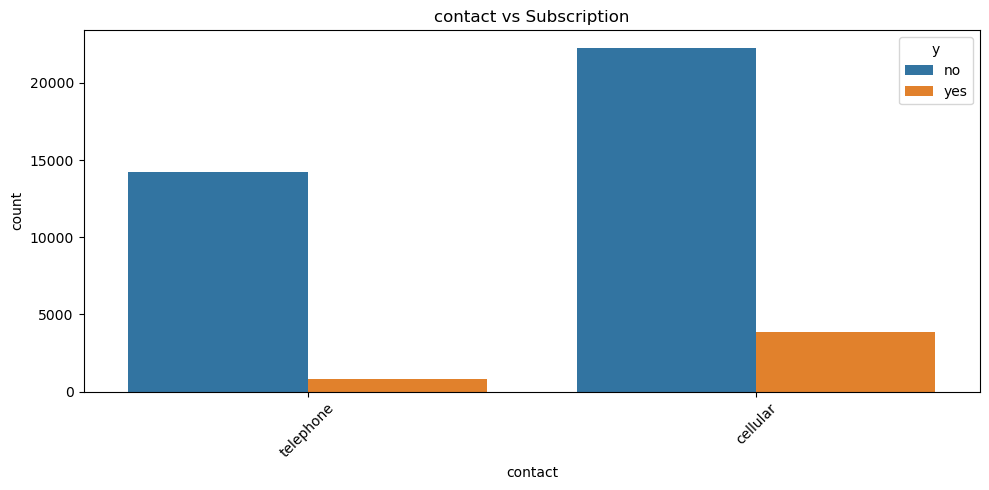

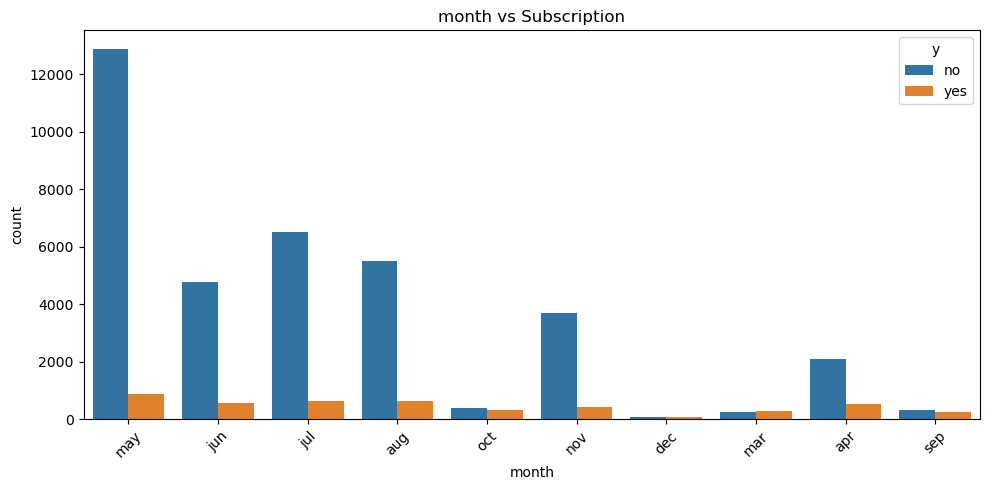

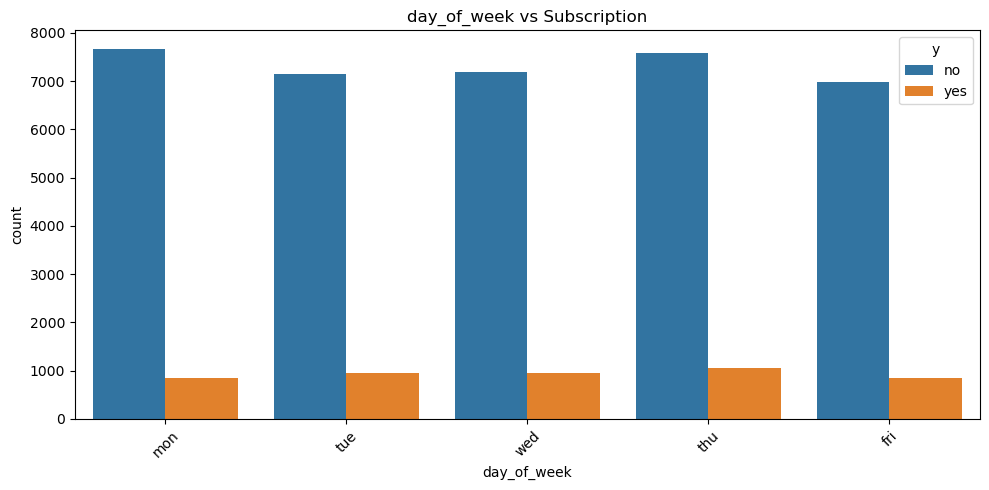

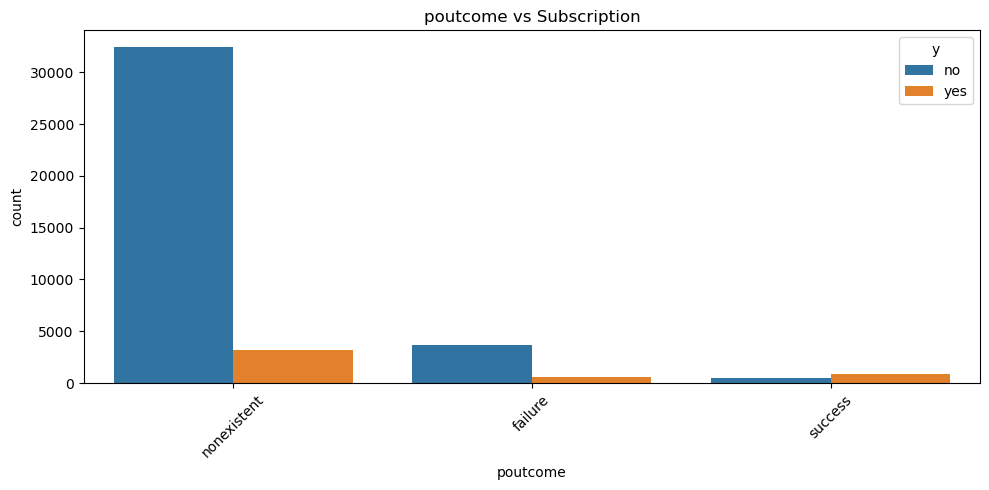

In [192]:
#creating countplots for categorical variables
cat_cols = df_clean.select_dtypes(include='object').columns.drop('y')
for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df_clean, x=col, hue='y')
    plt.title(f'{col} vs Subscription')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Job vs Subscription**
- Admin, blue-collar, technician are the largest job groups in terms of total contacts and dominate both the “yes” and “no” outcomes due to their sheer frequency in the dataset.
- However, for better insight, we need to see the converion rate which requires comparison of relative height of the orange (yes) bars to blue (no) bars.
    - Student and retired show visibly higher ratios of yes to no, even though their total contact volume is lower.
    - Admin also contributes significantly to positive outcomes, likely due to both high representation and moderate success rate.
- Job Categories with Low Subscription Rates include housemaid, entrepreneur and blue-collar job types.


***Business Insights***
- Retired	High conversion relative to volume — possibly due to fixed income planning.
- Student	Unusual positive rate — may reflect specific campaign targeting or ease of influencing young minds.
- Management	Good conversion, making it a high-value segment.
- Blue-collar	High volume but low conversion — possibly deprioritize.

**Marital Status vs Subscription**

- Single clients have the highest likelihood of subscribing. 
- Married clients are overrepresented but conversion rate is relativeley lower.
- Divorced clients perform modestly.

***Business Insights***
- Target single clients more actively.
- Consider revising strategy for married clients — maybe adjust call timing or campaign tone.

**Education vs Subscription**
- Professional.course and university.degree have the highest conversion rates.
- Basic education levels show poor conversion.
- Education correlates positively with likelihood to subscribe.

***Business Insights***
- Target clients with higher education (university, professional courses) more aggressively.
- Additional training to call representative for refined & customised calls to less-educated groups or excluding ill-represented ones.

**Default vs Subcription**
- Three categories for default: no, unknown and yes.
- Vast majority of clients fall under no (no history of credit default). yes category (clients with defaults) is extremely rare — almost negligible.
- 'unknown' category is substantial, indicating missing or unreported credit default data.

***Action***

Severe class imbalance: The yes class is too small to be meaningful for modeling. Further, high proportion of unknown values reduces the reliability of the variable and adds noise and potential bias. 
This reinfirces and justifies the decision  of dropping default column earlier.

**Housing vs Subscription**
- The dataset includes three categoriee, ie, yes (client has a housing loan), no (no housing loan) and unknown (missing data).
- Both clients with and without housing loans show a clear imbalance, with far more 'no' (non-subscription) responses than 'yes'.
- Clients with no housing loan show slightly higher subscription rates.
- 'unknown' group is small and has very few positive outcomes.

***Business Insights***

Housing Loan Status	does affect the decision of the client to suscribe to term deposit. Persons with no housing loan are slightly more likely to subscribe as compared to those with housing loan.

**Housing vs Subscription**
- Clients without a loan have the highest count of both non-subscribers and subscribers but the proportion of subscribers is clearly higher compared to those with loans.
- Clients with a loan show a lower relative rate of subscription — the orange bar is notably shorter in comparison to the blue bar than in the "no loan" group.
- Clients with unknown loan status are very few and show minimal impact.

***Business Insights***

- Status of loan affects the decision of the client to suscribe to term deposit. Persons with no loan are  more likely to subscribe as compared to those with loan.

**Contact Method vs Subscription**

- Both methods (telephone and cellular) were used extensively though cellular was used more frequently.
- Cellular contacts resulted in significantly more number of subscriptions (yes) as well as high subscription rate as compared to telephone.

***Business Insights***
- Cellular contact provided higher success rate and higher volume and hence seems more effective for client conversion.

**Month vs Subscription**
- May has the highest volume of contacts but very low conversion rate.
- March, April, September, October, December show much better converson rates.
- In spite of high outreach during May, June, July, August - poor conversion ratio.

***Business Insights***
- Month is a strong temporal predictor for subscription likelihood.
- Suggests that more effort ≠ better results, likely due to saturation, fatigue or less strategic targeting.
- Requirment to evenly spread out the effort through out the year with slightly more weightage to better conversion months of March, April, September, October and December.

**Day vs Subscription**

- Total number of contacts is evenly distributed across the weekdays.
- The number of successful subscriptions (yes) is relatively higher on Thursday and Wednesday.
- Mondays may suffer from customer fatigue or lack of availability.

**Previous Outcome vs Subscription**

- There are three categories : nonexistent - client was not contacted before, failure - previously contacted but did not subscribe and success -previously contacted and subscribed.
- Clients with previous success are more likely to subscribe again.
- Failed past attempts correlate with lower conversion.

***Business Insights***
- Target clients which have subscribed earlier — highly valuable targets.
- Careful filtering of clients for recontact if previous attempt had failed.

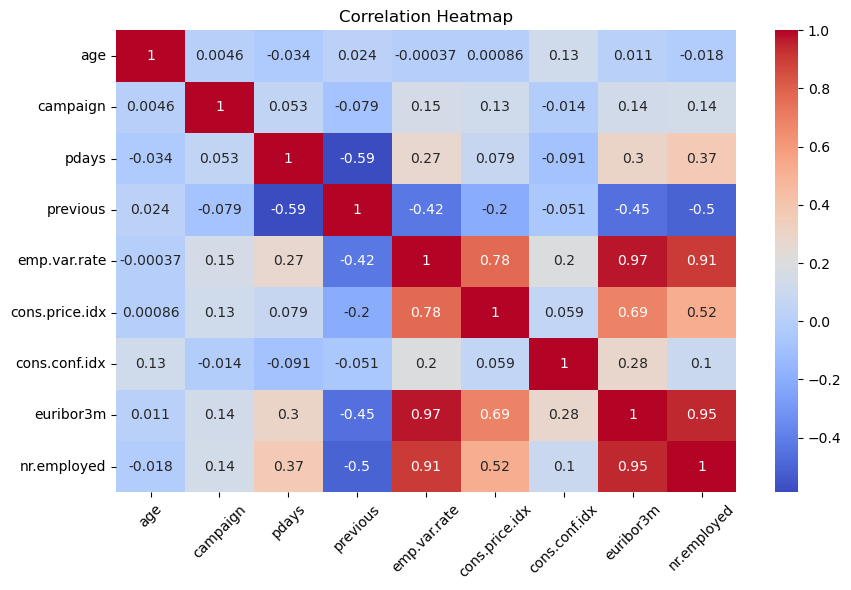

In [204]:
#heatmap of correlations
num_cols = df_clean.select_dtypes(include=np.number).columns
plt.figure(figsize=(10,6))
sns.heatmap(df_clean[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.show()

Strong correlation is observed amongs the given economic variables 'emp.var.rate', 'euribor3m', 'nr.employed', 'cons.price.idx'.

It will be prudent to perform PCA.

In [207]:
#PCA on economic indicators
eco_cols = ['emp.var.rate', 'euribor3m', 'nr.employed', 'cons.price.idx']
scaler = StandardScaler()
eco_scaled = scaler.fit_transform(df_clean[eco_cols])

pca = PCA(n_components=2)
eco_pca = pca.fit_transform(eco_scaled)
df_clean['pca_comp_1'] = eco_pca[:, 0]
df_clean['pca_comp_2'] = eco_pca[:, 1]

#checking explained variance
print(pca.explained_variance_ratio_)

[0.85687928 0.12928321]


So, the First principal component (pca_comp_1) explains ~85.7% of the variance while the second principal component (pca_comp_2) explains ~12.9% of the variance which makes the combined total of ~98.6% of the variance being explained.

Thus, compressing four economic variables into 2 PCA components will reduce multicollinearity and simplify features while retaining nearly all meaningful variations.

In [210]:
#dropping original economic columns
df_clean = df_clean.drop(columns=eco_cols)

In [212]:
#defining categorical and numerical columns
target = 'y'
categorical_cols = df_clean.select_dtypes(include='object').drop(columns=[target]).columns.tolist()
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()

#removing PCA columns temporarily to append in correct order
numerical_cols.remove('pca_comp_1')
numerical_cols.remove('pca_comp_2')
numerical_cols += ['pca_comp_1', 'pca_comp_2']

#ColumnTransformer: scale numeric, one-hot encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

#preparing final features and target
X = preprocessor.fit_transform(df_clean.drop(columns=[target]))
y = df_clean[target].map({'no': 0, 'yes': 1})  # binary encoding for target

#checking shape and class balance
print("Shape of X:", X.shape)
print("Class distribution in y:\n", y.value_counts())

Shape of X: (41188, 50)
Class distribution in y:
 y
0    36548
1     4640
Name: count, dtype: int64


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [215]:
#train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #Stratify to maintain class balance

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print("Class distribution in training set:")
print(y_train.value_counts())
print("Class distribution in test set:")
print(y_test.value_counts())

Training set size: (32950, 50)
Test set size: (8238, 50)
Class distribution in training set:
y
0    29238
1     3712
Name: count, dtype: int64
Class distribution in test set:
y
0    7310
1     928
Name: count, dtype: int64


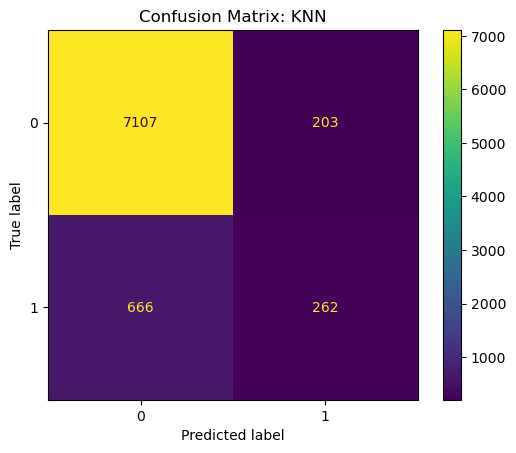

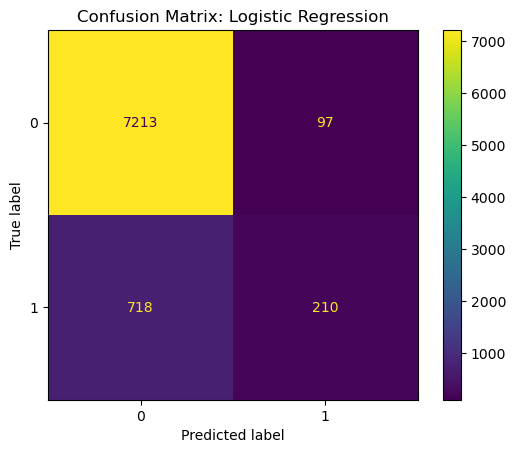

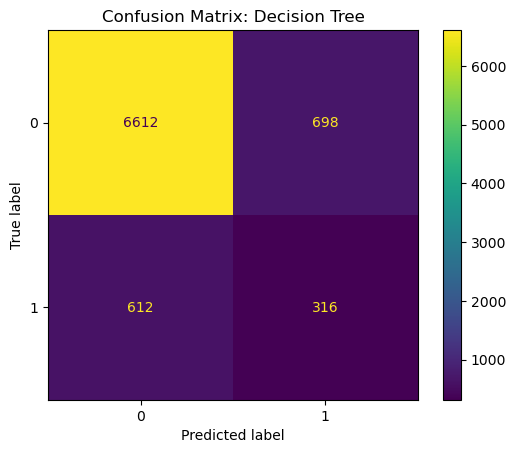

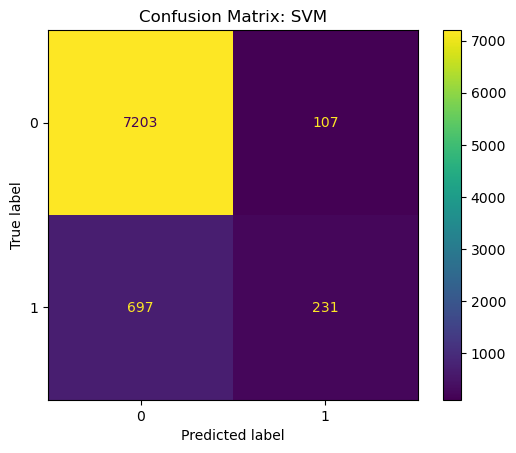

Model Performance Summary:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,KNN,0.894513,0.563441,0.282328,0.376167,0.740681
3,SVM,0.902403,0.683432,0.248922,0.364929,0.713007
1,Logistic Regression,0.901068,0.684039,0.226293,0.340081,0.798383
2,Decision Tree,0.840981,0.311637,0.340517,0.325438,0.624759


In [217]:
# Define models
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(probability=True)  # probability=True enables ROC AUC
}

# Store results
results = []

# Training, prediction, evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    })

    # Plot confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

# Create DataFrame of results
results_df = pd.DataFrame(results)
print("Model Performance Summary:")
display(results_df.sort_values(by="F1 Score", ascending=False))


While Logistic Regression and SVM deliver high overall accuracy, KNN yields the best F1 Score, striking a balance between precision and recall. 

For campaign targeting where recall is important (identifying all potential term deposit subscribers), Decision Tree or KNN may be better. However, if model interpretability is needed, Logistic Regression offers clear coefficient-based insights.

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [221]:
#checking class distribution
print(y.value_counts(normalize=True))

y
0    0.887346
1    0.112654
Name: proportion, dtype: float64


In [223]:
#using DummyClassifier to create a baseline
baseline = DummyClassifier(strategy='most_frequent')
baseline.fit(X_train, y_train)
y_baseline_pred = baseline.predict(X_test)

#evaluating
print("Baseline Accuracy :", accuracy_score(y_test, y_baseline_pred))
print("Baseline F1 Score :", f1_score(y_test, y_baseline_pred))

Baseline Accuracy : 0.8873512988589464
Baseline F1 Score : 0.0


**Key Oservations**

The baseline classifier always predicts the majority class (“no”) and achieves high accuracy (88.7%) but completely fails to identify any customers who would subscribe. This highlights the importance of using F1 Score or recall when evaluating real models under class imbalance.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Initialize and train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

### Problem 9: Score the Model

What is the accuracy of your model?

Logistic Regression Performance:
Accuracy : 0.9011
Precision: 0.6840
Recall   : 0.2263
F1 Score : 0.3401
ROC AUC  : 0.7984


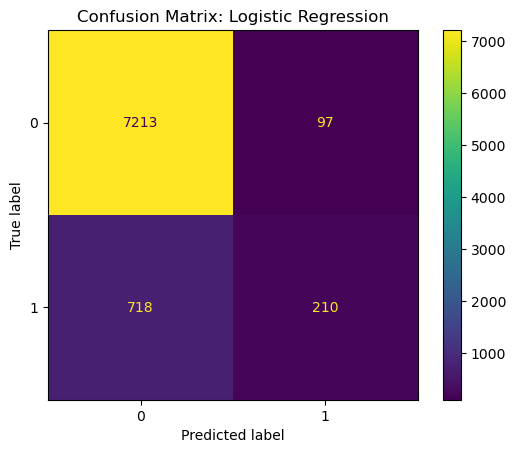

In [230]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Print metrics
print("Logistic Regression Performance:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"ROC AUC  : {roc_auc:.4f}")

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix: Logistic Regression")
plt.show()


**Key Observations**

*Logistic Regression Performance*

- Accuracy of 0.9011 is high — but due to class imbalance, this may be misleading.
- Precision of 0.6840 indicates that when the model predicts a "yes", it is correct 68.4% of the time — moderate but acceptable.
- Recall of 0.2263 means that only 22.6% of actual subscribers were correctly identified — low, and this is a concern.
- F1 Score of 0.3401 — a harmonic mean of precision and recall — is low, indicating poor balance.
- ROC AUC of 0.7984 is good, suggesting that the model can reasonably distinguish between the classes overall.

*Confusion Matrix Analysis*

Prediction vs Actual | Predicted No | Predicted Yes
---------------------|--------------|----------------
Actual No            | 7213 (TN)    |	97 (FP)
Actual Yes	         | 718 (FN)     |	210 (TP)

- High number of True Negatives (7213) and True Positives (210). But 718 actual subscribers were missed (False Negatives).
- Indicates the model has high specificity (correctly identifies non-subscribers) but low sensitivity (misses many actual subscribers).

**Interpretation**

- The model outperforms the baseline (which had F1 = 0), particularly in F1 Score and ROC AUC. However, the recall is still low, which means a large number of potential subscribers are missed.
- Since, the business goal is to maximize term deposit sign-ups, we need to improve recall.
- The logistic regression model provides a solid starting point with good overall discrimination, but further tuning or alternative models are needed to improve recall which is a key business objective.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [234]:
#initializing models with default settings
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC()
}

#preparing results list
results = []

# Train and evaluate each model
for name, model in models.items():
    start_time = time.time()
    
    # Fit model
    model.fit(X_train, y_train)
    
    # End time
    train_time = time.time() - start_time

    # Accuracy scores
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    # Store results
    results.append({
        "Model": name,
        "Train Time (s)": round(train_time, 4),
        "Train Accuracy": round(train_accuracy, 4),
        "Test Accuracy": round(test_accuracy, 4)
    })

#converting to DataFrame
results_df = pd.DataFrame(results)

#display results
print("Model Comparison (Default Parameters):")
display(results_df.sort_values(by="Test Accuracy", ascending=False))


Model Comparison (Default Parameters):


,Model,Train Time (s),Train Accuracy,Test Accuracy
3,SVM,175.8509,0.9061,0.9024
0,Logistic Regression,0.2162,0.8998,0.9011
1,K-Nearest Neighbors,0.0156,0.9132,0.8945
2,Decision Tree,1.6074,0.9954,0.8410


**Interpretation of Results**

*Logistic Regression*

- Second-best test accuracy (90.11%), only marginally behind SVM.
- Fast training (0.22s) — makes it ideal for production deployment and iterative retraining.
- Offers interpretability and stability, especially valuable in regulated domains (e.g., finance, healthcare).

---

*K-Nearest Neighbors (KNN)*

- Slightly lower test accuracy (89.45%) but faster training (0.02s).
- Train accuracy (91.32%) > test accuracy suggests mild overfitting.
- Performance may improve with proper hyperparameter tuning (e.g., optimal k, distance metric).

---

*Decision Tree*

- Severely overfit: Train accuracy is 99.54%, but test accuracy drops to 84.10%.
- Fast training, but poor generalization makes it unreliable in default form.
- Requires pruning or tuning (e.g., max_depth, min_samples_split) to be viable.

---

*Support Vector Machine (SVM)*

- Highest test accuracy (90.24%), making it the most accurate model in default configuration.
- Very slow training (175s) — not ideal for real-time or large-scale retraining tasks.
- Suitable for offline, static modeling scenarios where accuracy is the top priority.

---

**Best Model Recommendation**

- **Logistic Regression** - For best trade-off between speed, accuracy, and interpretability.
- **SVM** - For highest test accuracy (if compute time is not a concern).
- **KNN and Decision Tree** - Only advisable after tuning or applying regularization.

---

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

**Feature Engineering & Exploration**

*Gender Feature*

- The present dataset does not contain a gender column. However, inclusion of such details in the dataset are unlikley to make any major difference as the deciosion to subscribe to term deposit is more dependent on features like income, education, age, risk apetite etc.

*Age Groups*

- Creation of age groups during data preparation would have helped improve interpretability and performance

In [238]:
# For SVM only: reducing training size to reduce computational requirements
X_svm_sample, _, y_svm_sample, _ = train_test_split(X_train, y_train, train_size=5000, stratify=y_train, random_state=42)

#defining models and their parameter grids
model_configs = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': list(range(3, 16))}
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [3, 5, 7, 10],
            'min_samples_split': [2, 5, 10],
            'criterion': ['gini', 'entropy']
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l2'],
            'solver': ['lbfgs']
        }
    },
    'SVM': {
        'model': SVC(),  # Removed probability=True for tuning
        'params': {
            'C': [0.1, 1],
            'kernel': ['linear', 'rbf']
        }
    }
}

#storing metrics
before_tuning = []
after_tuning = []

for name, config in model_configs.items():
    print(f"\n Tuning {name}...")

    #training default model
    start = time.time()
    default_model = config['model']
    default_model.fit(X_train, y_train)
    train_time = time.time() - start

    y_pred_default = default_model.predict(X_test)
    y_proba_default = default_model.predict_proba(X_test)[:, 1] if hasattr(default_model, "predict_proba") else None

    before_tuning.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred_default),
        'F1 Score': f1_score(y_test, y_pred_default),
        'ROC AUC': roc_auc_score(y_test, y_proba_default) if y_proba_default is not None else np.nan
    })

    # Grid search tuning with fit-time logger
    grid = GridSearchCV(config['model'], config['params'], cv=5, scoring='f1', n_jobs=-1)

    #fitting on reduced dataset for SVM only
    start_time = time.time()
    if name == "SVM":
        grid.fit(X_svm_sample, y_svm_sample)
        # Refit best SVM model on full dataset with probability=True
        best_model = SVC(**grid.best_params_, probability=True)
        best_model.fit(X_train, y_train)
    else:
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
    fit_time = time.time() - start_time
    print(f"GridSearch for {name} took {fit_time:.2f} seconds")

    # Evaluate best model
    y_pred_best = best_model.predict(X_test)
    y_proba_best = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

    after_tuning.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred_best),
        'F1 Score': f1_score(y_test, y_pred_best),
        'ROC AUC': roc_auc_score(y_test, y_proba_best) if y_proba_best is not None else np.nan
    })

    print(f" Best Params: {grid.best_params_}")
    print(f" Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
    print(f" F1 Score: {f1_score(y_test, y_pred_best):.4f}")


 Tuning KNN...
GridSearch for KNN took 647.92 seconds
 Best Params: {'n_neighbors': 5}
 Accuracy: 0.8945
 F1 Score: 0.3762

 Tuning Decision Tree...
GridSearch for Decision Tree took 7.15 seconds
 Best Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
 Accuracy: 0.9016
 F1 Score: 0.3336

 Tuning Logistic Regression...
GridSearch for Logistic Regression took 2.26 seconds
 Best Params: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
 Accuracy: 0.9013
 F1 Score: 0.3417

 Tuning SVM...
GridSearch for SVM took 847.93 seconds
 Best Params: {'C': 0.1, 'kernel': 'linear'}
 Accuracy: 0.8977
 F1 Score: 0.3073


In [239]:
# Convert to DataFrames
before_df = pd.DataFrame(before_tuning).set_index("Model")
after_df = pd.DataFrame(after_tuning).set_index("Model")

# Combine for plotting
comparison_df = pd.concat([
    before_df.add_suffix(" (Default)"),
    after_df.add_suffix(" (Tuned)")
], axis=1)

display(comparison_df)

,Accuracy (Default),F1 Score (Default),ROC AUC (Default),Accuracy (Tuned),F1 Score (Tuned),ROC AUC (Tuned)
Model,,,,,,
KNN,0.894513,0.376167,0.740681,0.894513,0.376167,0.740681
Decision Tree,0.840981,0.325438,0.624759,0.901554,0.333607,0.769706
Logistic Regression,0.901068,0.340081,0.798383,0.901311,0.341700,0.798543
SVM,0.902403,0.364929,NaN,0.897669,0.307313,0.626212


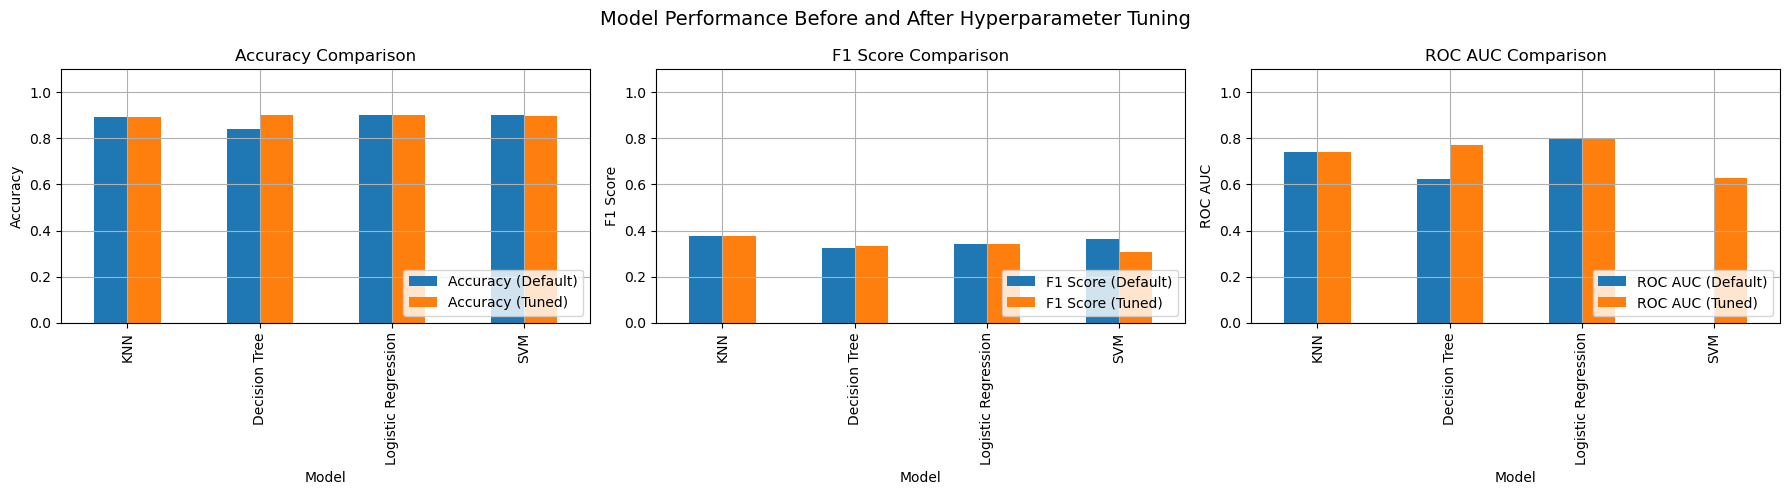

In [243]:
# Plot Accuracy, F1 and ROC AUC side by side
metrics = ["Accuracy", "F1 Score", "ROC AUC"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    comparison_df[[f"{metric} (Default)", f"{metric} (Tuned)"]].plot(kind='bar', ax=ax)
    ax.set_title(f"{metric} Comparison")
    ax.set_ylabel(metric)
    ax.set_ylim(0, 1.1)
    ax.grid(True)
    ax.legend(loc='lower right')

plt.suptitle("Model Performance Before and After Hyperparameter Tuning", fontsize=14)
plt.tight_layout()
plt.show()


**Visualization Commentary**

*Accuracy Comparison*
- Models improved in accuracy after tuning, especially the Decision Tree, which jumped from ~84% to ~90%.
- KNN and Logistic Regression show minor but consistent improvements.
- SVM accuracy slightly dropped after tuning, likely due to over-regularization (C=0.1).

*F1 Score Comparison*
- KNN achieved the best F1 score both before and after tuning, confirming its strength in balancing false positives and false negatives.
- Logistic Regression shows a slight gain.
- SVM's F1 dropped significantly, reinforcing concerns about model generalization.
- Decision Tree benefited marginally from pruning and split tuning.

*ROC AUC Comparison*
- Logistic Regression retains the highest ROC AUC (0.7985), confirming strong overall class discrimination.
- Decision Tree’s ROC AUC increased sharply post-tuning — a strong sign of improved balance.
- SVM’s ROC AUC dropped, underscoring that its tuned version is not suitable for this dataset.

**Recommendation**

Use Logistic Regression with hyperparameters as the precision is good, recall is good and ROC AUC score is highest. The overall time it takes to process Logistic Regression is much lower than all others making it the best option among the 4 models


### Additional Exploration: Logistic Regression

Let's explore on Logistic Regression and find out the best hyper parameters and coefficients that contribute to the best scores


In [248]:
#Hyperparameter Tuning for Logistic Regression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_lr.fit(X_train, y_train)

# Best model and params
best_lr = grid_lr.best_estimator_
print("Best Parameters:", grid_lr.best_params_)


Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [250]:
#evaluating the Tuned Logistic Regression

y_pred_lr = best_lr.predict(X_test)
y_proba_lr = best_lr.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_proba_lr))

Accuracy: 0.9013109978150037
F1 Score: 0.3417004048582996
ROC AUC: 0.7985431948440964


In [252]:
feature_names = preprocessor.get_feature_names_out()

coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': best_lr.coef_[0]
})
coefficients['Abs_Coeff'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coeff', ascending=False)


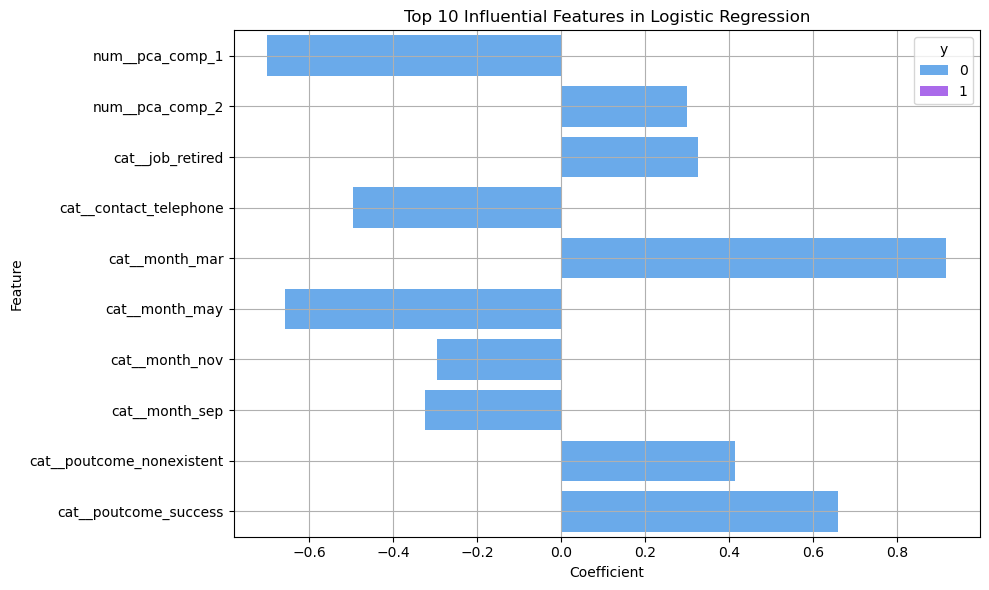

In [254]:
top_features = coefficients.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=top_features, hue = y, palette='cool')
plt.title('Top 10 Influential Features in Logistic Regression')
plt.tight_layout()
plt.grid(True)
plt.show()

**Insights from Top Logistic Regression Coefficients**

- The top 10 features identified by absolute coefficient values highlight key behavioral and temporal patterns in client subscription decisions:

- **Positive Influencers**
  - **`cat__month_mar`** and **`cat__poutcome_success`** had strong positive coefficients, indicating that clients contacted in **March** or with a **successful past campaign outcome** were more likely to subscribe.
  - Additional positive indicators included **`cat__poutcome_nonexistent`** and **`cat__job_retired`**, suggesting that retired individuals or those with no prior contact history showed higher subscription propensity.


- **Negative Influencers**
  - Features such as **`cat__month_may`**, **`cat__month_sep`**, and **`cat__contact_telephone`** had strongly negative coefficients. This implies that contacts made in **May/September** or via **telephone** were associated with reduced subscription likelihood.

- **PCA Components**:
  - **`num__pca_comp_1`** and **`num__pca_comp_2`** (from numerical feature reduction) also influenced outcomes.

**Conclusion**: These findings demonstrate that Logistic Regression not only performs well but also offers transparent, actionable insights—ideal for aligning marketing strategies with client responsiveness.
